In [63]:
import pandas as pd

path = "z2_processed_data_with_orgs.csv"
df = pd.read_csv(path, index_col=0)


In [64]:
# Drops rows with NaN values for sender and receiver org
df.dropna(subset=['sender_org', 'receiver_org'], inplace=True)

In [65]:
df['sender_org'].value_counts()

Communist Party of China               89
Communist Party of the Soviet Union    86
Workers' Party of Korea                 7
Name: sender_org, dtype: int64

In [66]:
df['receiver_org'].value_counts()

Communist Party of the Soviet Union    92
Communist Party of China               76
Workers' Party of Korea                14
Name: receiver_org, dtype: int64

In [67]:
# Converts date column to datetime and sorts by it
def clean_date(date_str):
    date_arr = date_str.split('_')
    new = date_arr[0] + '-' + date_arr[-1]
    return pd.to_datetime(new)

df["1"] = df["1"].apply(clean_date)

In [68]:
df.sort_values(by=['1'], inplace=True)
df

,Unnamed: 0.1,0,1,2,3,secondary_data,sentiment,recipient,sender,sender_org,receiver_org
577,577,Vasilevsky__Aleksandr_Mikhaylovich,1945-08-01,Telegram from Aleksandr Vasilevsky to Stalin 0,18.8.45Moscow. Personally to Cde. StalinCopy: ...,18845Moscow Personally to Cde StalinCopy: pers...,0,Stalin,Aleksandr Vasilevsky,Communist Party of the Soviet Union,Communist Party of the Soviet Union
578,578,Vasilevsky__Aleksandr_Mikhaylovich,1945-08-01,Cable from Aleksandr Vasilevsky to Stalin 0,Moscow. Cde. StalinCopy: General Staff Cde. An...,Moscow Cde StalinCopy: General Staff Cde Anton...,0,Stalin,Aleksandr Vasilevsky,Communist Party of the Soviet Union,Communist Party of the Soviet Union
762,762,unknown_creator,1947-10-01,Telegram Nos 408 411 Vyshinsky to Molotov 0,received via VChfrom NEW YORK\tthe SOVIET DELE...,received via VChfrom NEW YORK\tthe SOVIET DELE...,0,Molotov,Vyshinsky,Communist Party of the Soviet Union,Communist Party of the Soviet Union
271,271,Molotov__Vyacheslav_Mikhaylovich__1890-1986,1947-10-01,Draft of Telegram to Vyshinsky on the Korean Q...,[handwritten: a reply follows to Cde. Podtsero...,handwritten: a reply follows to Cde Podtserob...,0,Vyshinsky,NaN,Communist Party of the Soviet Union,Communist Party of the Soviet Union
270,270,Molotov__Vyacheslav_Mikhaylovich__1890-1986,1947-10-01,Ciphered Telegram Molotov to Cde Stalin 0,3RD UNIT\t\t\t\t\t\t\t\t\t BY CIPHERPRIORITYS...,3RD UNIT\t\t\t\t\t\t\t\t\t BY CIPHERPRIORITYS...,0,Cde Stalin,NaN,Communist Party of the Soviet Union,Communist Party of the Soviet Union
...,...,...,...,...,...,...,...,...,...,...,...
650,650,Zhou__Enlai__1898-1976_,1958-09-01,Memorandum of Conversation Premier Zhou Receiv...,Memorandum of Conversation: Premier Zhou Recei...,Memorandum of Conversation: Premier Zhou Recei...,0,China,Zhou Receives,Communist Party of China,Communist Party of China
28,28,China__Foreign_Ministry,1961-05-01,Cable Ministry of Foreign Affairs and Ministry...,"[North] KoreaExtra Rush, Early DeliveryOn the ...",North KoreaExtra Rush Early DeliveryOn the N...,0,the Chinese Embassy,Cable Ministry of Foreign Affairs,Communist Party of China,Communist Party of China
33,33,China__Ministry_of_Public_Security,1961-05-01,Cable Ministry of Public Security Party Commit...,Request for the Consular Department to handle....,Request for the Consular Department to handle ...,0,Zhou Enlai,Cable Ministry of Public Security Party Committee,Communist Party of China,Communist Party of China
31,31,China__Ministry_of_Foreign_Affairs,1964-08-01,Record of Conversation from Chairman Mao’s Rec...,Ministry of Foreign Affairs DocumentRecord of ...,Ministry of Foreign Affairs DocumentRecord of ...,0,China,Mao’s,Communist Party of China,Communist Party of China


In [69]:
# go through the telegrams, keeping track of [count_positive, count_total]
graph = {
    'Communist Party of China':
        {'Communist Party of China': [0,0],
        'Communist Party of the Soviet Union': [0,0],
        'Workers\' Party of Korea': [0,0]},
    'Communist Party of the Soviet Union': 
        {'Communist Party of China': [0,0],
        'Communist Party of the Soviet Union': [0,0],
        'Workers\' Party of Korea': [0,0]},
    'Workers\' Party of Korea':     
        {'Communist Party of China': [0,0],
        'Communist Party of the Soviet Union': [0,0],
        'Workers\' Party of Korea': [0,0]}
}

def get_percentage_positive(sentiment, receiver_org, sender_org, graph):
    if sentiment == 1:
        graph[sender_org][receiver_org][0] += 1
    graph[sender_org][receiver_org][1] += 1

    print("current positive:", graph[sender_org][receiver_org][0])
    print("current total:", graph[sender_org][receiver_org][1])
    return graph[sender_org][receiver_org][0]/graph[sender_org][receiver_org][1]

# def print_row(row):
#     print(row['sentiment'])

# df.apply(lambda row: print_row(row), axis=1)
df['sentiment_percentage'] = df.apply(lambda row: get_percentage_positive(row['sentiment'], row['receiver_org'], row['sender_org'], graph), axis=1)


current positive: 0
current total: 1
current positive: 0
current total: 2
current positive: 0
current total: 3
current positive: 0
current total: 4
current positive: 0
current total: 5
current positive: 0
current total: 6
current positive: 0
current total: 1
current positive: 0
current total: 7
current positive: 0
current total: 8
current positive: 0
current total: 9
current positive: 0
current total: 1
current positive: 0
current total: 1
current positive: 0
current total: 1
current positive: 0
current total: 1
current positive: 0
current total: 2
current positive: 0
current total: 2
current positive: 0
current total: 10
current positive: 0
current total: 11
current positive: 0
current total: 12
current positive: 0
current total: 2
current positive: 0
current total: 13
current positive: 0
current total: 3
current positive: 0
current total: 4
current positive: 0
current total: 14
current positive: 1
current total: 5
current positive: 0
current total: 15
current positive: 1
current tota

<AxesSubplot:title={'center':'Sentiments of USSR to China over time'}, xlabel='1'>

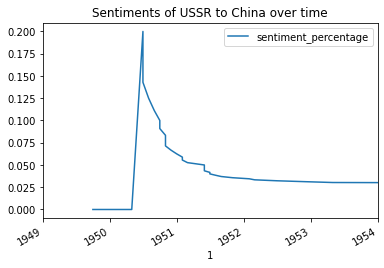

In [72]:

selected = df[(df['sender_org'] == "Communist Party of the Soviet Union") & (df['receiver_org'] == "Communist Party of China")]
selected.plot(x='1', y='sentiment_percentage', title='Sentiments of USSR to China over time', xlim=(pd.to_datetime('01-01-1949'), pd.to_datetime('01-01-1954')))

<AxesSubplot:title={'center':'Sentiments of China to USSR over time'}, xlabel='1'>

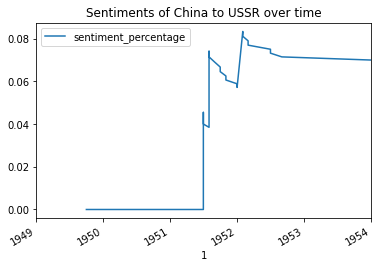

In [73]:

selected = df[(df['sender_org'] == "Communist Party of China") & (df['receiver_org'] == "Communist Party of the Soviet Union")]
selected.plot(x='1', y='sentiment_percentage', title='Sentiments of China to USSR over time', xlim=(pd.to_datetime('01-01-1949'), pd.to_datetime('01-01-1954')))